# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 2

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Acima são importadas algumas bilbiotecas para auxiliarem na resolução do problema. 

A seguir, é montado um dataset com as informações de [Iris](http://archive.ics.uci.edu/dataset/53/iris). O dataset é composto pelas medidas da sepala (comprimento x largura), em centímetros, e petala (comrimento x largura), em centímetros, de três espécies distintas: Iris Setosa, Iris Versicolour e Iris Virginica.

In [77]:
dataset_raw = np.loadtxt("iris.data", delimiter=",", dtype=str)
labels_dic = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
dataset_len = len(dataset_raw)

for i in range(dataset_len):
    dataset_raw[i, 4] = labels_dic[dataset_raw[i, 4]]

train_len = round(0.7 * dataset_len)
validation_len = round(0.15 * dataset_len)
dataset_permuted = np.random.permutation(dataset_raw)

X = dataset_permuted[:, 0:4].astype('float64')
y = dataset_permuted[:,4].astype('int64')

Para realizar o treinamento de uma Feedforward Neural Network, o dataset original é separado em três, seguindo as respectivas proporções:

- Dataset de treinamento (70%);
- Dataset de validação (15%);
- Dataset de teste (15%).

Antes da separação, é realizado um shuffle do dataset original.

In [78]:
X_train = np.array(X[0 : train_len])
y_train = np.array(y[0 : train_len])

X_validation = np.array(X[train_len : train_len + validation_len])
y_validation = np.array(y[train_len : train_len + validation_len])

X_test = np.array(X[train_len + validation_len: dataset_len])
y_test = np.array(y[train_len + validation_len: dataset_len])

### Criando a árvore de decisão com um mínimo de amostras por nó folha:

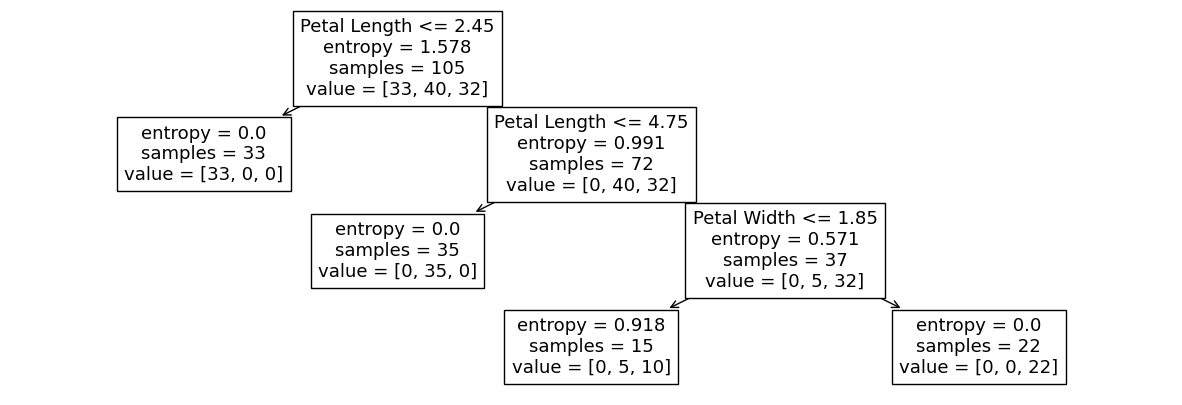

In [83]:
min_sample_leaf = 10
# criterion = 'gini'
criterion = 'entropy'
classTree = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_sample_leaf)
classTree.fit(X_train, y_train)
y_predict_train = classTree.predict(X_train)
y_predict_validation = classTree.predict(X_validation)
y_predict_test = classTree.predict(X_test)
plt.figure(figsize=(15,5))
fig = plot_tree(classTree, feature_names=['Sepal Length', 
                                          'Sepal Width', 
                                          'Petal Length', 
                                          'Petal Width'])

In [84]:
acc_train = (np.sum(y_predict_train == y_train) / len(y_train)) * 100
acc_validation = (np.sum(y_predict_validation == y_validation) / len(y_validation)) * 100
acc_test = (np.sum(y_predict_test == y_test) / len(y_test)) * 100

print(f'Accuracy train: {acc_train:.2f}%')
print(f'Accuracy validation: {acc_validation:.2f}%')
print(f'Accuracy test: {acc_test:.2f}%')

Accuracy train: 95.24%
Accuracy validation: 95.45%
Accuracy test: 95.65%


### Criando a árvore de decisão com um máximo de profundidade:

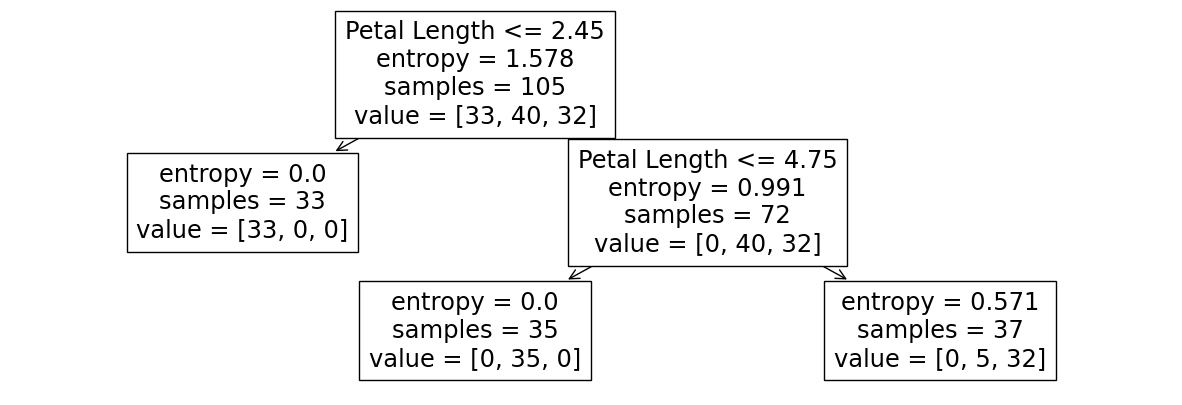

In [85]:
max_depth = 2
# criterion = 'gini'
criterion = 'entropy'
classTree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
classTree.fit(X_train, y_train)
y_predict_train = classTree.predict(X_train)
y_predict_validation = classTree.predict(X_validation)
y_predict_test = classTree.predict(X_test)
plt.figure(figsize=(15,5))
fig = plot_tree(classTree, feature_names=['Sepal Length', 
                                          'Sepal Width', 
                                          'Petal Length', 
                                          'Petal Width'])

In [86]:
acc_train = (np.sum(y_predict_train == y_train) / len(y_train)) * 100
acc_validation = (np.sum(y_predict_validation == y_validation) / len(y_validation)) * 100
acc_test = (np.sum(y_predict_test == y_test) / len(y_test)) * 100

print(f'Accuracy train: {acc_train:.2f}%')
print(f'Accuracy validation: {acc_validation:.2f}%')
print(f'Accuracy test: {acc_test:.2f}%')

Accuracy train: 95.24%
Accuracy validation: 95.45%
Accuracy test: 95.65%
